In [1]:
from lib.utilities import *
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
datadir = "." # All ZDA files in this directory + subdirectories are loaded
selected_filename = "Untitled005" # focus for subsequent analysis
file_type = '.tsm'
horizontal_cropping = [250, 750]  # This is the cropping recommended for 1024-px width
t_cropping = [0, -1]  # TSM artifacts
binning = 5

In [3]:
# Load data
processed = [] # to avoid re-processing later
data_loader = DataLoader()
if file_type == '.tsm':
    data_loader.load_all_tsm(data_dir=datadir + "/tsm_targets")

.\tsm_targets/Untitled004.tsm to be treated as TSM file to open
Reading file as 200 images of size 1024 x 320
TBN file designates origin as NI for this data.
Found 4 channels in BNC ratio: 1
{'points_per_trace': 200, 'raw_width': 1024, 'raw_height': 320, 'interval_between_samples': 1.0, 'number_of_trials': 1}
.\tsm_targets/Untitled005.tsm to be treated as TSM file to open
Reading file as 200 images of size 1024 x 320
TBN file designates origin as NI for this data.
Found 4 channels in BNC ratio: 1
{'points_per_trace': 200, 'raw_width': 1024, 'raw_height': 320, 'interval_between_samples': 1.0, 'number_of_trials': 1}


In [4]:
# Select data of interest        
selected_data = data_loader.select_data_by_keyword(selected_filename)

# Increase binning and cropping until PhotoZ can manage the image size
selected_data.clip_data(y_range=horizontal_cropping, t_range=t_cropping)
selected_data.bin_data(binning=binning)

raw_data, meta, rli = selected_data.get_data(), selected_data.get_meta(), selected_data.get_rli()
fp_data = selected_data.fp_data

{'points_per_trace': 199, 'raw_width': 199, 'raw_height': 100, 'interval_between_samples': 1.0, 'number_of_trials': 1} (1, 199, 319, 500)


In [5]:
# Fill in missing metadata
meta['version'] = 5
meta['slice_number'] = 5
meta['location_number'] = 5
meta['record_number'] = 5
meta['camera_program'] = 2

meta['interval_between_trials'] = 1
meta['acquisition_gain'] = 1
meta['time_RecControl'] = 5

meta['reset_onset'] = 1
meta['reset_duration'] = 5
meta['shutter_onset'] = 5
meta['shutter_duration'] = 5

meta['stimulation1_onset'] = 20
meta['stimulation1_duration'] = 1
meta['stimulation2_onset'] = 0
meta['stimulation2_duration'] = 0

meta['acquisition_onset'] = 1
meta['interval_between_samples'] = 5

meta['raw_width'] = raw_data.shape[2]
meta['raw_height'] = raw_data.shape[3]
meta['points_per_trace'] = raw_data.shape[1]
meta['number_of_trials'] = raw_data.shape[0]

rli = {}
rli['rli_low'] = [0] * int(meta['raw_width'] * meta['raw_height'])
rli['rli_high'] = [0] * int(meta['raw_width'] * meta['raw_height'])
rli['rli_max'] = [0] * int(meta['raw_width'] * meta['raw_height'])

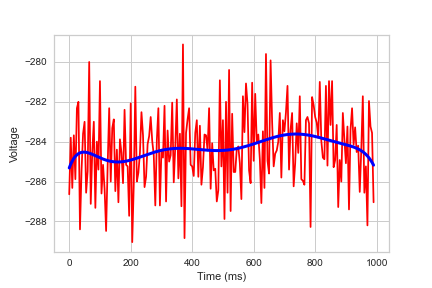

In [6]:
# Run this cell at most once

# Apply baseline correction here. Because PhotoZ chokes on baseline correcting TurboSM data
tr = Tracer()
#data inversing
raw_data = -raw_data

# Need to subtract off the low-frequency voltage drift. First-order correction
tr.correct_background(meta, raw_data)

0


array([[[[1916, 1958, 1855, ..., 1533, 2077, 1815],
         [1937, 1799, 2022, ..., 1630, 1611, 1908],
         [1834, 1934, 2037, ..., 1510, 1996, 1877],
         ...,
         [1866, 1922, 2030, ..., 1913, 1880, 1817],
         [2024, 2065, 2092, ..., 1904, 1669, 1698],
         [1990, 1909, 1851, ..., 1968, 1938, 1869]],

        [[2138, 2074, 2221, ..., 2192, 2001, 2167],
         [2182, 2250, 2012, ..., 1875, 2298, 2277],
         [2093, 1953, 2059, ..., 1913, 2079, 2257],
         ...,
         [2114, 2073, 1973, ..., 1814, 2063, 1960],
         [2050, 2164, 1980, ..., 2166, 2144, 2428],
         [2178, 2187, 2264, ..., 2200, 2334, 2152]],

        [[1913, 2159, 1967, ..., 1854, 1981, 1756],
         [2044, 2120, 1835, ..., 2042, 2283, 1611],
         [2114, 2408, 2051, ..., 2654, 2301, 1808],
         ...,
         [2027, 1855, 2002, ..., 2047, 2015, 2244],
         [1890, 1841, 2119, ..., 1991, 2235, 1972],
         [1967, 2023, 1998, ..., 1907, 1710, 1900]],

        ...,

  

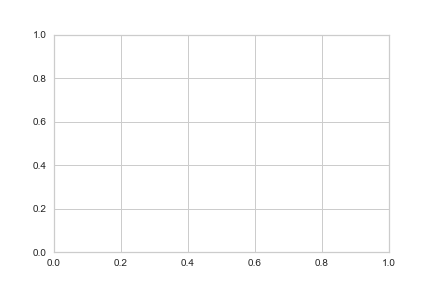

In [7]:
plt.subplots() # finalize plot from previous cell
# normalize raw data to 12-bit range
raw_data -= np.min(raw_data)
raw_data /= np.max(raw_data)
raw_data *= (2 ** 12)

raw_data = raw_data.astype(np.int16)
print(np.min(raw_data))
raw_data

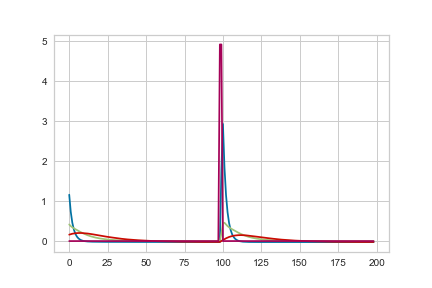

In [8]:
fig, ax = plt.subplots()
ax.plot(fp_data[t_cropping[0]:t_cropping[1], :])

In [9]:
# Write data
print(raw_data)
zda_writer = ZDA_Writer()
zda_writer.write_zda_to_file(raw_data, meta, selected_filename + ".zda", rli, fp_data[t_cropping[0]:t_cropping[1], :])

plt.plot(raw_data[0,:,40,40])

[[[[1916 1958 1855 ... 1533 2077 1815]
   [1937 1799 2022 ... 1630 1611 1908]
   [1834 1934 2037 ... 1510 1996 1877]
   ...
   [1866 1922 2030 ... 1913 1880 1817]
   [2024 2065 2092 ... 1904 1669 1698]
   [1990 1909 1851 ... 1968 1938 1869]]

  [[2138 2074 2221 ... 2192 2001 2167]
   [2182 2250 2012 ... 1875 2298 2277]
   [2093 1953 2059 ... 1913 2079 2257]
   ...
   [2114 2073 1973 ... 1814 2063 1960]
   [2050 2164 1980 ... 2166 2144 2428]
   [2178 2187 2264 ... 2200 2334 2152]]

  [[1913 2159 1967 ... 1854 1981 1756]
   [2044 2120 1835 ... 2042 2283 1611]
   [2114 2408 2051 ... 2654 2301 1808]
   ...
   [2027 1855 2002 ... 2047 2015 2244]
   [1890 1841 2119 ... 1991 2235 1972]
   [1967 2023 1998 ... 1907 1710 1900]]

  ...

  [[2168 2094 2215 ... 1898 1826 2297]
   [2101 2101 1881 ... 2420 2024 2131]
   [2196 2050 1811 ... 1647 2127 2314]
   ...
   [2106 2107 2023 ... 1993 1869 2169]
   [2005 1979 2117 ... 2177 2200 1973]
   [1865 2171 2171 ... 2150 2144 2032]]

  [[2151 2203 2194 ..